**INTRODUCTION**

The aim in this project is to explore the dynamics of demand and price of electricity in Ontario, Canada by closely examining certain economic indicators. The hope is to unveil insights that could be useful in trading or developing trading strategies, or even policy making.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
demand_price_df = pd.read_csv("/content/ontario_electricity_demand.csv")
exchange_rate = pd.read_csv("/content/CAD Exchange Rate Data.csv")
mortgage_rate = pd.read_csv("/content/Canadian Mortage Rate Data.csv")
monthly_cpi = pd.read_csv("/content/Monthly CPI data.csv")
monthly_commodity_pi = pd.read_csv("/content/Monthly Commodity Price Index.csv")
repo_rate = pd.read_csv("/content/Canadian Money Market Data.csv")

In [3]:
exchange_rate.head()

,date,FXAUDCAD,FXBRLCAD,FXCNYCAD,FXEURCAD,FXHKDCAD,FXINRCAD,FXIDRCAD,FXJPYCAD,FXMYRCAD,...,FXZARCAD,FXKRWCAD,FXSEKCAD,FXCHFCAD,FXTWDCAD,FXTHBCAD,FXTRYCAD,FXGBPCAD,FXUSDCAD,FXVNDCAD
0,03/01/2017,0.9702,0.4121,0.1930,1.3973,0.1732,0.01965,0.000100,0.01140,0.2991,...,0.09740,0.001112,0.1465,1.3064,0.04150,0.03739,0.3744,1.6459,1.3435,0.000059
1,04/01/2017,0.9678,0.4129,0.1920,1.3930,0.1717,0.01959,0.000099,0.01134,0.2961,...,0.09767,0.001111,0.1460,1.3005,0.04141,0.03717,0.3722,1.6377,1.3315,0.000059
2,05/01/2017,0.9708,0.4133,0.1922,1.4008,0.1708,0.01954,0.000099,0.01145,0.2953,...,0.09743,0.001118,0.1468,1.3083,0.04161,0.03709,0.3674,1.6400,1.3244,0.000058
3,06/01/2017,0.9668,0.4116,0.1911,1.3953,0.1706,0.01942,0.000099,0.01133,0.2957,...,0.09647,0.001103,0.1461,1.3020,0.04131,0.03704,0.3640,1.6275,1.3214,0.000059
4,09/01/2017,0.9728,0.4135,0.1907,1.3967,0.1706,0.01942,0.000099,0.01138,0.2955,...,0.09681,0.001100,0.1460,1.3020,0.04129,0.03709,0.3557,1.6084,1.3240,0.000059


In [4]:
usd_cad = exchange_rate[["date", "FXUSDCAD"]].copy()
usd_cad.head()

,date,FXUSDCAD
0,03/01/2017,1.3435
1,04/01/2017,1.3315
2,05/01/2017,1.3244
3,06/01/2017,1.3214
4,09/01/2017,1.3240


In [5]:
mortgage_rate.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2000-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,8.34,NaN,NaN,NaN,2
1,2000-02,Canada,2016A000011124,Percent,239,units,0,v733833,1,8.43,NaN,NaN,NaN,2
2,2000-03,Canada,2016A000011124,Percent,239,units,0,v733833,1,8.24,NaN,NaN,NaN,2
3,2000-04,Canada,2016A000011124,Percent,239,units,0,v733833,1,8.23,NaN,NaN,NaN,2
4,2000-05,Canada,2016A000011124,Percent,239,units,0,v733833,1,8.50,NaN,NaN,NaN,2


In [6]:
monthly_mortgage = mortgage_rate[["REF_DATE", "VALUE"]].copy()
monthly_mortgage.head()

,REF_DATE,VALUE
0,2000-01,8.34
1,2000-02,8.43
2,2000-03,8.24
3,2000-04,8.23
4,2000-05,8.50


In [7]:
monthly_mortgage.rename(columns = {"REF_DATE": "date"}, inplace=True)

In [8]:
monthly_cpi.head()

,date,V41690973,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW
0,01/01/1995,86.6,86.6,0.6,1.8,1.7,1.2,NaN,2.2,1.7
1,01/02/1995,87.0,87.0,1.9,1.8,1.8,1.2,NaN,1.8,1.7
2,01/03/1995,87.2,87.2,2.1,1.9,1.8,1.5,NaN,2.1,1.9
3,01/04/1995,87.5,87.4,2.5,2.1,1.9,1.5,NaN,2.1,2.0
4,01/05/1995,87.7,87.7,2.9,2.3,2.1,1.9,NaN,2.6,2.2


In [9]:
cpi_data = monthly_cpi[["date", "CPI_TRIM"]]
cpi_data["CPI_TRIM"].astype(float)
cpi_data.head()

,date,CPI_TRIM
0,01/01/1995,1.8
1,01/02/1995,1.8
2,01/03/1995,1.9
3,01/04/1995,2.1
4,01/05/1995,2.3


In [10]:
monthly_commodity_pi.head()

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
0,01/01/1972,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,01/02/1972,100.40,100.53,99.78,100.74,100.12,101.20,88.89
2,01/03/1972,101.11,101.35,100.05,101.38,100.24,102.53,98.97
3,01/04/1972,101.16,101.45,99.84,101.21,100.95,102.08,103.10
4,01/05/1972,101.88,102.30,100.00,101.25,102.32,103.53,86.30


In [11]:
monthly_commodity_price_index = monthly_commodity_pi[["date", "M.BCPI"]].copy()
monthly_commodity_price_index["M.BCPI"].astype(float)
monthly_commodity_price_index.head()

,date,M.BCPI
0,01/01/1972,100.00
1,01/02/1972,100.40
2,01/03/1972,101.11
3,01/04/1972,101.16
4,01/05/1972,101.88


In [12]:
monthly_energy_price_index = monthly_commodity_pi[["date", "M.ENER"]].copy()
monthly_energy_price_index["M.ENER"].astype(float)
monthly_energy_price_index.head()

,date,M.ENER
0,01/01/1972,100.00
1,01/02/1972,99.78
2,01/03/1972,100.05
3,01/04/1972,99.84
4,01/05/1972,100.00


In [13]:
repo_rate.head()

,date,CL.CDN.MOST.1DL,AVG.INTWO,TB.CDN.30D.MID,TB.CDN.60D.MID,TB.CDN.90D.MID,TB.CDN.180D.MID,TB.CDN.1Y.MID
0,12/08/1997,NaN,3.250,NaN,NaN,NaN,NaN,NaN
1,18/08/1997,NaN,3.300,NaN,NaN,NaN,NaN,NaN
2,19/08/1997,NaN,3.260,NaN,NaN,NaN,NaN,NaN
3,20/08/1997,NaN,3.345,NaN,NaN,NaN,NaN,NaN
4,21/08/1997,NaN,3.385,NaN,NaN,NaN,NaN,NaN


In [14]:
corra = repo_rate[["date", "AVG.INTWO"]].copy()
corra.head()

,date,AVG.INTWO
0,12/08/1997,3.250
1,18/08/1997,3.300
2,19/08/1997,3.260
3,20/08/1997,3.345
4,21/08/1997,3.385


In [15]:
demand_price_df.head()

,date,hour,hourly_demand,hourly_average_price
0,2002-05-01,1,14137000,22.97
1,2002-05-01,2,13872000,23.27
2,2002-05-01,3,13820000,24.54
3,2002-05-01,4,13744000,15.17
4,2002-05-01,5,14224000,23.59


In [16]:
demand_price_df["hourly_average_price"].sort_values(ascending=False)

59651     1891.14
130291    1822.95
131047    1711.03
165753    1660.80
123691    1619.60
           ...   
81748     -128.28
81749     -128.40
81768     -128.64
76016     -138.43
78887     -138.79
Name: hourly_average_price, Length: 183432, dtype: float64

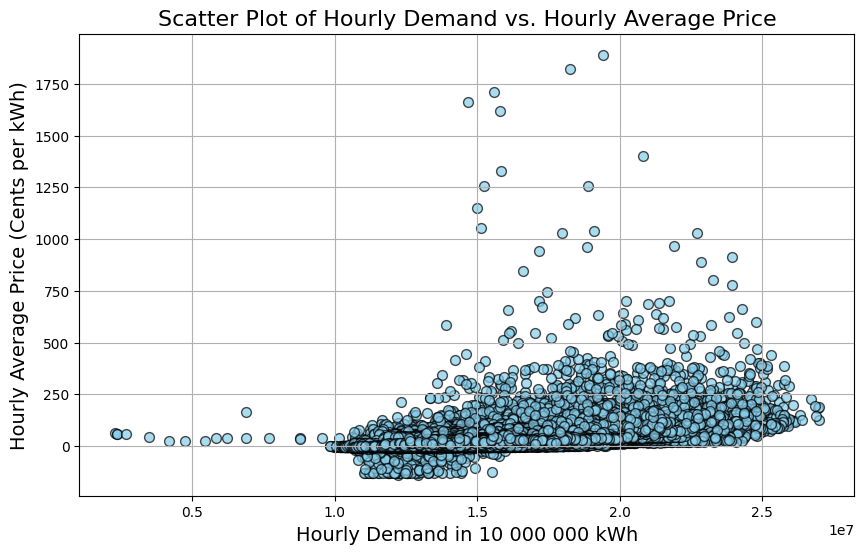

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x=demand_price_df["hourly_demand"], y=demand_price_df["hourly_average_price"],  color="skyblue", alpha=0.7, edgecolor="black", s=50)

plt.title("Scatter Plot of Hourly Demand vs. Hourly Average Price", fontsize=16)
plt.xlabel("Hourly Demand in 10 000 000 kWh", fontsize=14)
plt.ylabel("Hourly Average Price (Cents per kWh)", fontsize=14)
plt.grid(True)

plt.show()

In [18]:
demand_price_df[demand_price_df["hourly_average_price"] > 1000]

,date,hour,hourly_demand,hourly_average_price
3013,2002-09-03,14,22718000,1028.42
59650,2009-02-18,11,19103000,1039.27
59651,2009-02-18,12,19413000,1891.14
112279,2015-02-20,8,20807000,1402.44
114063,2015-05-05,16,15238000,1255.89
117656,2015-10-02,9,15115000,1053.11
123691,2016-06-09,20,15787000,1619.60
123692,2016-06-09,21,15826000,1327.89
130291,2017-03-11,20,18260000,1822.95
131047,2017-04-12,8,15591000,1711.03


Interestingly, it appears that on the days were average Electricity prices broke the C$10 per kWh there usually is a huge spike in hourly average price as each date is unique (Except 9th June 2016 and 18th Feb 2009). Perhaps google can provide some more insight into what happened on these days.

Although the hourly demand on 2016-06-09 was consistent for the average hourly demand typically experienced in the month of June, the hourly average price was extremely high. An article from the Canadian Nuclear Association provides more context, on this day, the Ontario government publicized its climate change action plan which outlined intentions to significantly increase investments in Nuclear Energy and phase out energy from fossil fuels.

https://cna.ca/2016/06/09/nuclear-industry-welcomes-ontario-climate-action-plan/


A possible explanation for the surge in prices of 18th February 2009 can be attributed to the Green Energy Act of February 2009 which aimed to encourage electricity production from biofuels, wind, solar etc. by guaranteeing above market rates for producers. The surges in prices on this day could've been a market reaction. Again, the electricity demanded seems to follow the pattern given the averages for month of the year and time of the day. More info can be found here:

https://www.fraserinstitute.org/article/ontarios-green-energy-act-bad-bargain-ontarians


Negative pricing occurs when there is a surplus of electricity in Ontario.

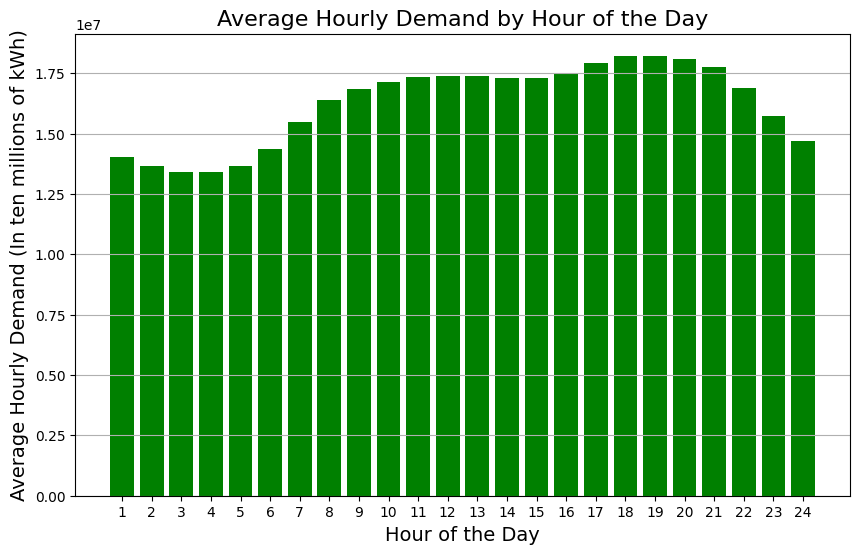

In [19]:
average_demand_by_hour = demand_price_df.groupby("hour")["hourly_demand"].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_demand_by_hour.index, average_demand_by_hour, color="green")
plt.title("Average Hourly Demand by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Average Hourly Demand (In ten millions of kWh)", fontsize=14)
plt.xticks(range(1, 25))
plt.grid(axis="y")
plt.show()

In [20]:
demand_price_df["date"] = pd.to_datetime(demand_price_df["date"])

demand_price_df["month"] = demand_price_df["date"].dt.month
demand_price_df["year"] = demand_price_df["date"].dt.year

demand_price_df.head()

,date,hour,hourly_demand,hourly_average_price,month,year
0,2002-05-01,1,14137000,22.97,5,2002
1,2002-05-01,2,13872000,23.27,5,2002
2,2002-05-01,3,13820000,24.54,5,2002
3,2002-05-01,4,13744000,15.17,5,2002
4,2002-05-01,5,14224000,23.59,5,2002


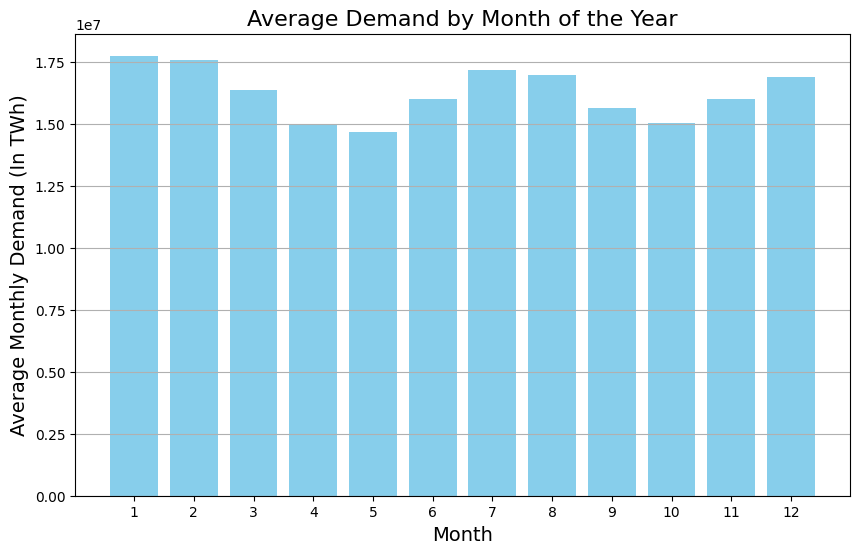

In [21]:
average_demand_by_month = demand_price_df.groupby("month")["hourly_demand"].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_demand_by_month.index, average_demand_by_month, color="skyblue")
plt.title("Average Demand by Month of the Year", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Monthly Demand (In TWh)", fontsize=14)
plt.xticks(range(1, 13))
plt.grid(axis="y")
plt.show()

It appears there's seasonality in the demand for electricity in Ontario. Demand peaks at the start of the year in Jan and Feb and reduces in the spring. Demand surges once again in the deep summer months and reduces in the fall before peaking in the winter.

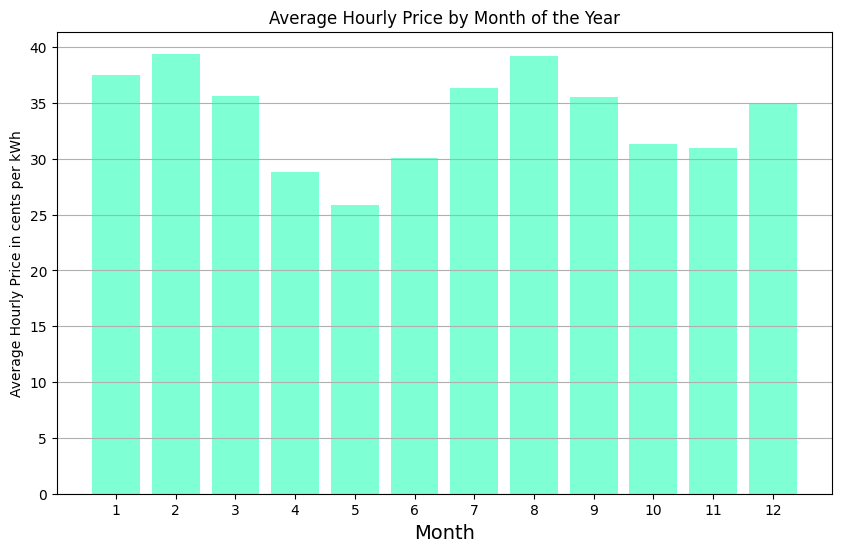

In [22]:
average_price_by_month = demand_price_df.groupby("month")["hourly_average_price"].mean()

plt.figure(figsize=(10,6))
plt.bar(average_price_by_month.index, average_price_by_month, color="aquamarine")
plt.title("Average Hourly Price by Month of the Year")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Hourly Price in cents per kWh")
plt.xticks(range(1,13))
plt.grid(axis="y")
plt.show()

Although demand is highest in January, average hourly prices are highest in February and August. August has the 4th highest average demand.

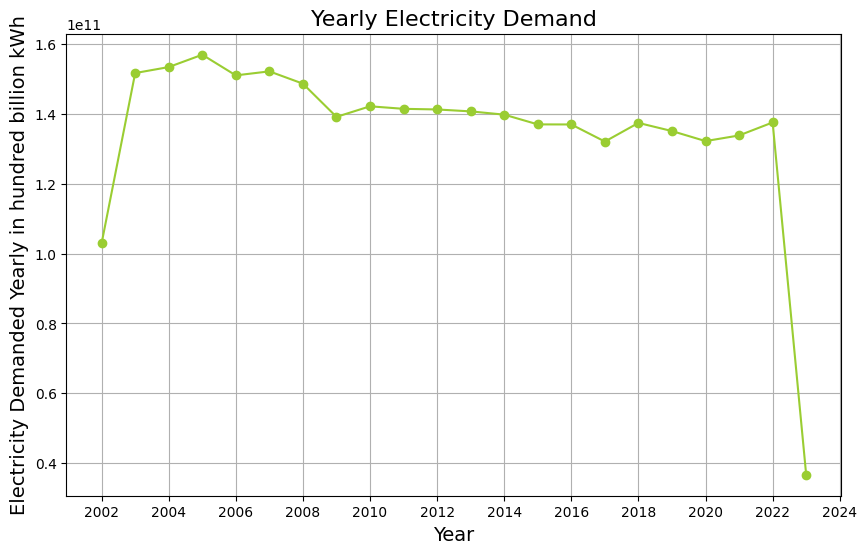

In [23]:
from matplotlib.ticker import MultipleLocator

demand_per_year = demand_price_df.groupby("year")["hourly_demand"].sum()

plt.figure(figsize=(10, 6))
plt.plot(demand_per_year.index, demand_per_year, color="yellowgreen", marker= "o", linestyle = "-")
plt.title("Yearly Electricity Demand", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Demanded Yearly in hundred billion kWh", fontsize=14)
plt.xticks(demand_per_year.index)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True)
plt.show()

In [24]:
demand_price_df[demand_price_df["year"]==2023]

,date,hour,hourly_demand,hourly_average_price,month,year
181200,2023-01-01,1,13514000,14.42,1,2023
181201,2023-01-01,2,13225000,19.21,1,2023
181202,2023-01-01,3,12726000,14.50,1,2023
181203,2023-01-01,4,12629000,26.26,1,2023
181204,2023-01-01,5,12625000,35.78,1,2023
...,...,...,...,...,...,...
183427,2023-04-03,20,16590000,27.78,4,2023
183428,2023-04-03,21,16140000,38.68,4,2023
183429,2023-04-03,22,15434000,82.19,4,2023
183430,2023-04-03,23,14355000,36.37,4,2023


The reason for the steep drop in electricity demand as seen in the visualization is that the data is only available until April 4th 2023.

In [25]:
demand_price_df[demand_price_df["year"]==2002]

,date,hour,hourly_demand,hourly_average_price,month,year
0,2002-05-01,1,14137000,22.97,5,2002
1,2002-05-01,2,13872000,23.27,5,2002
2,2002-05-01,3,13820000,24.54,5,2002
3,2002-05-01,4,13744000,15.17,5,2002
4,2002-05-01,5,14224000,23.59,5,2002
...,...,...,...,...,...,...
5875,2002-12-31,20,17913000,27.72,12,2002
5876,2002-12-31,21,17201000,26.39,12,2002
5877,2002-12-31,22,16559000,27.42,12,2002
5878,2002-12-31,23,15922000,26.72,12,2002


As with the year 2023, the data for 2002 does not reflect the complete calendar year.

In [26]:
monthly_demand_price = demand_price_df.copy()
yearly_demand_price = demand_price_df.copy()
daily_demand_price = demand_price_df.copy()

In [27]:
monthly_demand_price["year_month"] = monthly_demand_price["date"].dt.to_period("M")
monthly_demand_price = monthly_demand_price.groupby("year_month").agg({"hourly_demand": "sum", "hourly_average_price": "mean"}).reset_index()
monthly_demand_price.head()

,year_month,hourly_demand,hourly_average_price
0,2002-05,11874901000,29.192110
1,2002-06,12185238000,35.133806
2,2002-07,14033343000,58.097298
3,2002-08,13748878000,64.183441
4,2002-09,12593138000,75.192986


In [28]:
yearly_demand_price["year"] = yearly_demand_price["date"].dt.year
yearly_demand_price = yearly_demand_price.groupby("year").agg({"hourly_demand": "sum", "hourly_average_price": "mean"}).reset_index()
yearly_demand_price.head()

,year,hourly_demand,hourly_average_price
0,2002,102972868000,51.997893
1,2003,151719470000,54.045418
2,2004,153436970000,49.949662
3,2005,156971620000,68.492054
4,2006,151054281000,46.383076


In [29]:
daily_demand_price["date"] = daily_demand_price["date"].dt.date
daily_demand_price = daily_demand_price.groupby("date").agg({"hourly_demand": "sum", "hourly_average_price": "mean"}).reset_index()
daily_demand_price.head()

,date,hourly_demand,hourly_average_price
0,2002-05-01,395175000,28.387917
1,2002-05-02,409141000,30.090833
2,2002-05-03,396259000,31.659583
3,2002-05-04,354419000,26.552500
4,2002-05-05,338993000,24.855417


In [30]:
datasets = [daily_demand_price, monthly_demand_price, yearly_demand_price]

for dataset in datasets:
  dataset.rename(columns = {"hourly_demand": "total_demand"}, inplace = True)

**Exploring the relationships between the demand for and price of electricity in Ontario and chosen economic factors/indicators**

- Inflation
- Mortgage
- Exchange Rate
- Commodity Price Index

In [31]:
dfs_to_merge = [cpi_data, monthly_commodity_price_index, monthly_energy_price_index]


for df in dfs_to_merge:
  df["year_month"] = pd.to_datetime(df["date"], format="%d/%m/%Y").dt.to_period("M")
  df.drop(columns=["date"], inplace=True)

monthly_mortgage["year_month"] = pd.to_datetime(monthly_mortgage["date"]).dt.to_period("M")

# Merge each DataFrame in the list with "monthly_demand_price"
for df in [monthly_mortgage, cpi_data, monthly_commodity_price_index, monthly_energy_price_index]:
    monthly_demand_price = pd.merge(monthly_demand_price, df, on="year_month", how="left")

<ipython-input-31-947bb1f97055>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_month"] = pd.to_datetime(df["date"], format="%d/%m/%Y").dt.to_period("M")
<ipython-input-31-947bb1f97055>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["date"], inplace=True)


In [32]:
monthly_demand_price.rename(columns = {"VALUE": "mortgage_rate", "CPI_TRIM": "inflation_rate", "M.BCPI": "bcpi", "M.ENER": "ener_pi"}, inplace=True)

In [33]:
monthly_demand_price.sample(n=10)

,year_month,total_demand,hourly_average_price,date,mortgage_rate,inflation_rate,bcpi,ener_pi
87,2009-08,12225812000,26.072930,2009-08,5.13,1.5,484.47,1265.49
157,2015-06,10624316000,14.197542,2015-06,3.72,1.5,443.06,1060.97
65,2007-10,11908216000,48.906573,2007-10,6.69,2.4,598.38,1616.99
156,2015-05,10547132000,14.220269,2015-05,3.74,1.5,443.03,1062.41
142,2014-03,12672074000,76.585470,2014-03,4.16,1.5,635.52,1736.00
122,2012-07,13456890000,31.392997,2012-07,4.23,1.5,585.59,1464.90
136,2013-09,10837167000,19.600597,2013-09,4.33,1.3,631.57,1731.27
140,2014-01,13613596000,61.443374,2014-01,4.38,1.5,613.00,1658.61
204,2019-05,10219560000,7.012191,2019-05,4.30,2.2,437.96,1067.61
63,2007-08,13454597000,53.624785,2007-08,6.62,2.5,551.28,1414.54


**RELATIONSHIP BETWEEN TOTAL MONTHLY DEMAND, AVERAGE HOURLY PRICE AND NATIONAL INFLATION RATE**

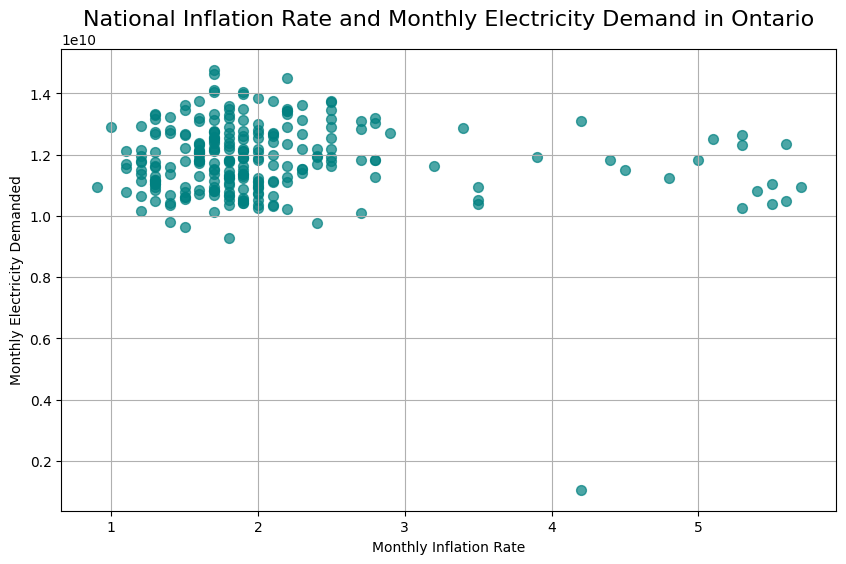

In [34]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["inflation_rate"], y=monthly_demand_price["total_demand"], alpha=0.7, s=50, color="teal")
plt.title("National Inflation Rate and Monthly Electricity Demand in Ontario", fontsize=16)
plt.xlabel("Monthly Inflation Rate")
plt.ylabel("Monthly Electricity Demanded")
plt.grid(True)
plt.show()

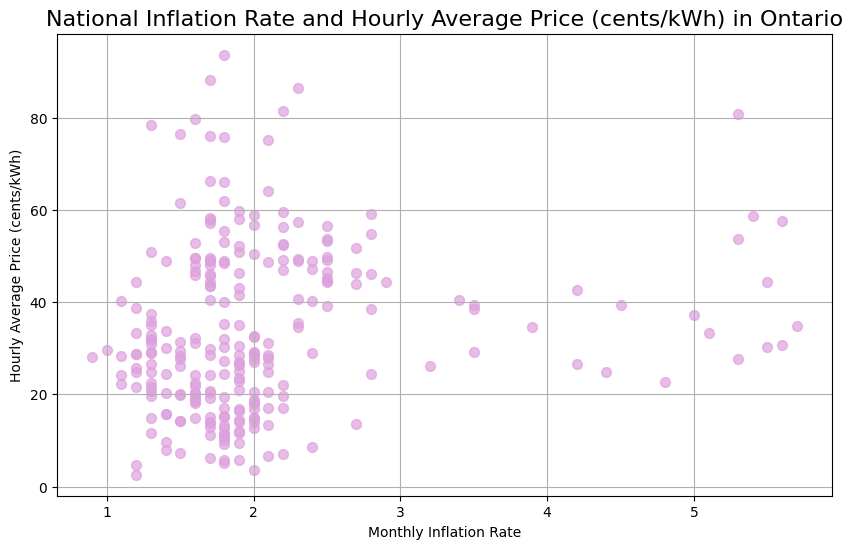

In [35]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["inflation_rate"], y=monthly_demand_price["hourly_average_price"], alpha=0.7, s=50, color="plum")
plt.title("National Inflation Rate and Hourly Average Price (cents/kWh) in Ontario", fontsize=16)
plt.xlabel("Monthly Inflation Rate")
plt.ylabel("Hourly Average Price (cents/kWh)")
plt.grid(True)
plt.show()

**RELATIONSHIP BETWEEN TOTAL MONTHLY DEMAND, AVERAGE HOURLY PRICE AND MORTGAGE RATES**

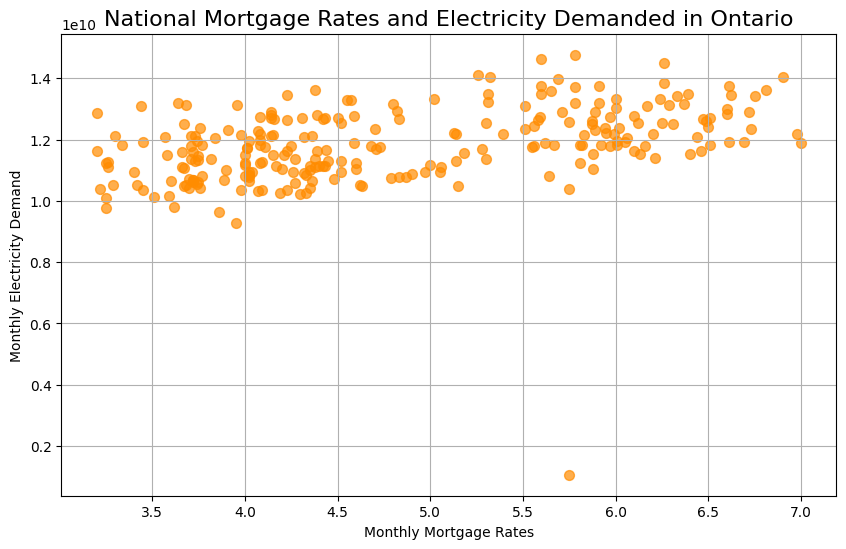

In [36]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["mortgage_rate"], y=monthly_demand_price["total_demand"], alpha=0.7, s=50, color="darkorange")
plt.title("National Mortgage Rates and Electricity Demanded in Ontario", fontsize=16)
plt.xlabel("Monthly Mortgage Rates")
plt.ylabel("Monthly Electricity Demand")
plt.grid(True)
plt.show()

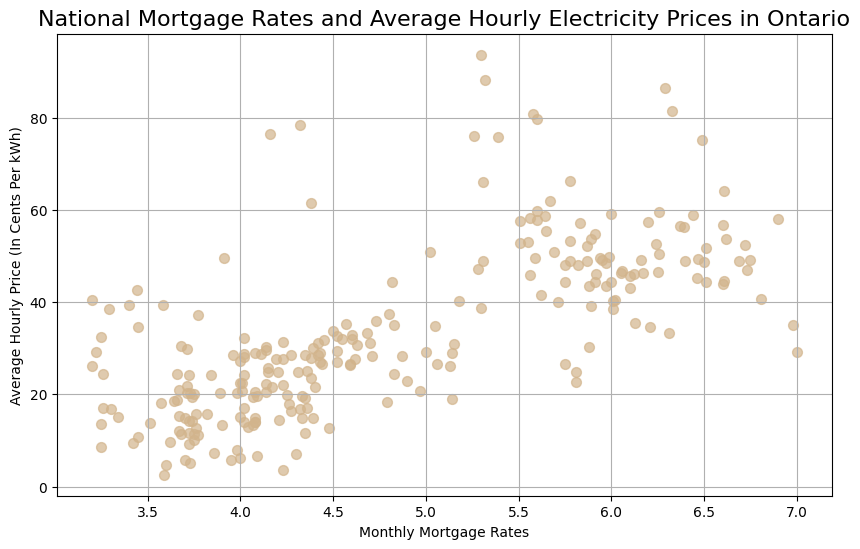

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["mortgage_rate"], y=monthly_demand_price["hourly_average_price"], alpha=0.7, s=50, color="tan")
plt.title("National Mortgage Rates and Average Hourly Electricity Prices in Ontario", fontsize=16)
plt.xlabel("Monthly Mortgage Rates")
plt.ylabel("Average Hourly Price (In Cents Per kWh)")
plt.grid(True)
plt.show()

**RELATIONSHIP BETWEEN COMMODITY PRICE INDEX AND PRICE, DEMAND OF ELECTRICITY IN ONTARIO**

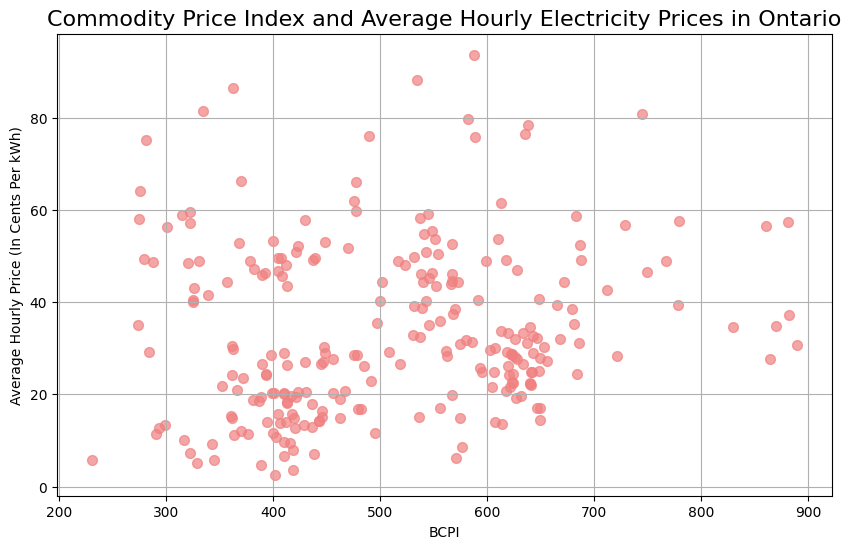

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["bcpi"], y=monthly_demand_price["hourly_average_price"], alpha=0.7, s=50, color="lightcoral")
plt.title("Commodity Price Index and Average Hourly Electricity Prices in Ontario", fontsize=16)
plt.xlabel("BCPI")
plt.ylabel("Average Hourly Price (In Cents Per kWh)")
plt.grid(True)
plt.show()

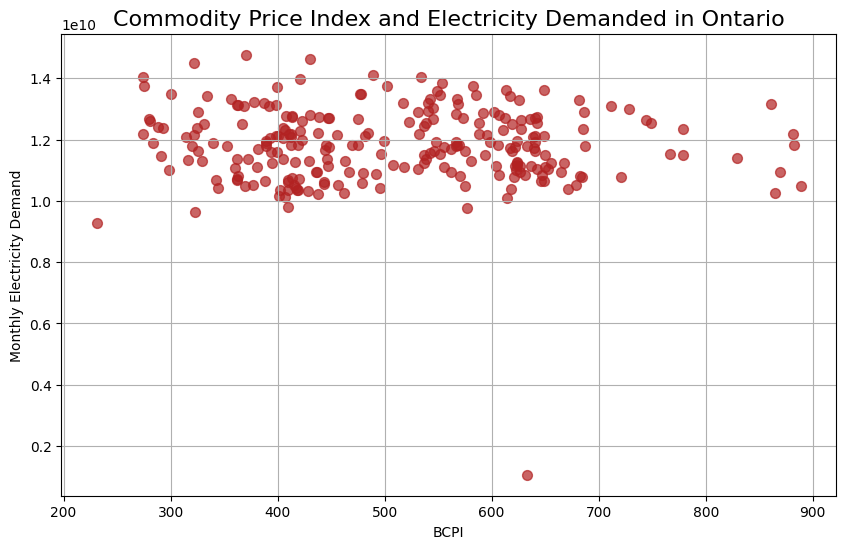

In [39]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["bcpi"], y=monthly_demand_price["total_demand"], alpha=0.7, s=50, color="firebrick")
plt.title("Commodity Price Index and Electricity Demanded in Ontario", fontsize=16)
plt.xlabel("BCPI")
plt.ylabel("Monthly Electricity Demand")
plt.grid(True)
plt.show()

**RELATIONSHIP BETWEEN ENERGY PRICE INDEX AND PRICE, DEMAND OF ELECTRICITY IN ONTARIO**

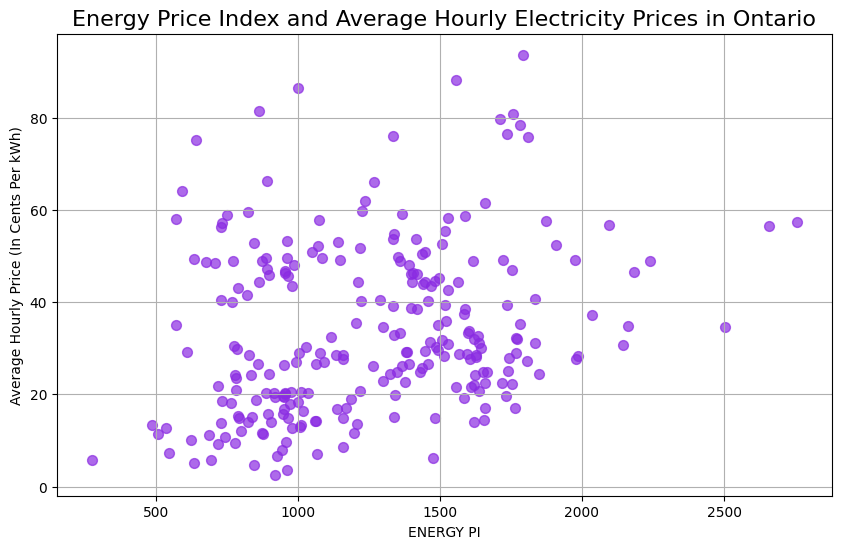

In [40]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["ener_pi"], y=monthly_demand_price["hourly_average_price"], alpha=0.7, s=50, color="blueviolet")
plt.title("Energy Price Index and Average Hourly Electricity Prices in Ontario", fontsize=16)
plt.xlabel("ENERGY PI")
plt.ylabel("Average Hourly Price (In Cents Per kWh)")
plt.grid(True)
plt.show()

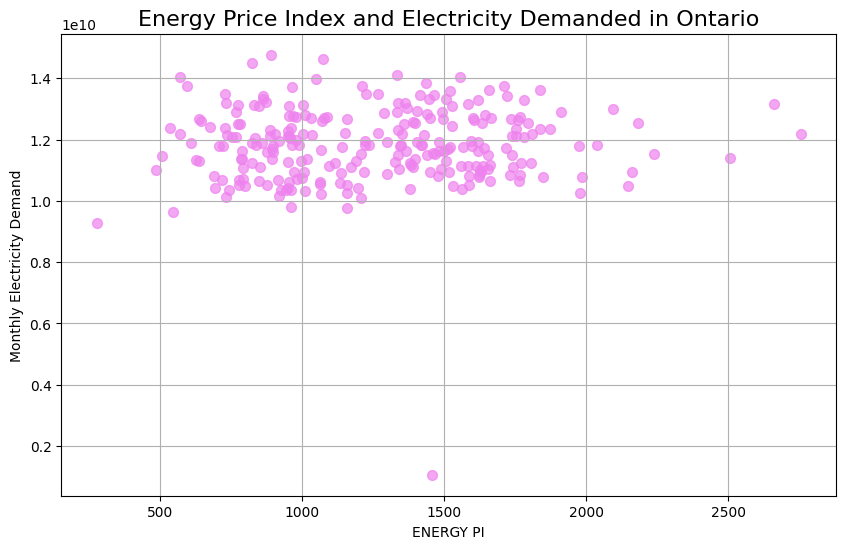

In [41]:
plt.figure(figsize=(10,6))

plt.scatter(x=monthly_demand_price["ener_pi"], y=monthly_demand_price["total_demand"], alpha=0.7, s=50, color="violet")
plt.title("Energy Price Index and Electricity Demanded in Ontario", fontsize=16)
plt.xlabel("ENERGY PI")
plt.ylabel("Monthly Electricity Demand")
plt.grid(True)
plt.show()

**OBSERVATIONS**

- It appears there is a positive relationship between National mortgage rates and electricity demand, average hourly prices in Ontario.
- The relationship appears to be stronger between Monthly Mortgage Rates and Average Hourly Electricity Prices.
- There are weak negative relationships between national inflation, commodity price index and electricity demanded in Ontario.
- There is a weak but considerable positive relatonship between Energy Price Index and Average Hourly Electricity prices in Ontario.
- Linear Regression could be a powerful tool for speculating demand and average hourly price of electricity in Ontario based on Monthly Mortgage rates.

<ipython-input-42-456936f5c05f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = monthly_demand_price.corr()


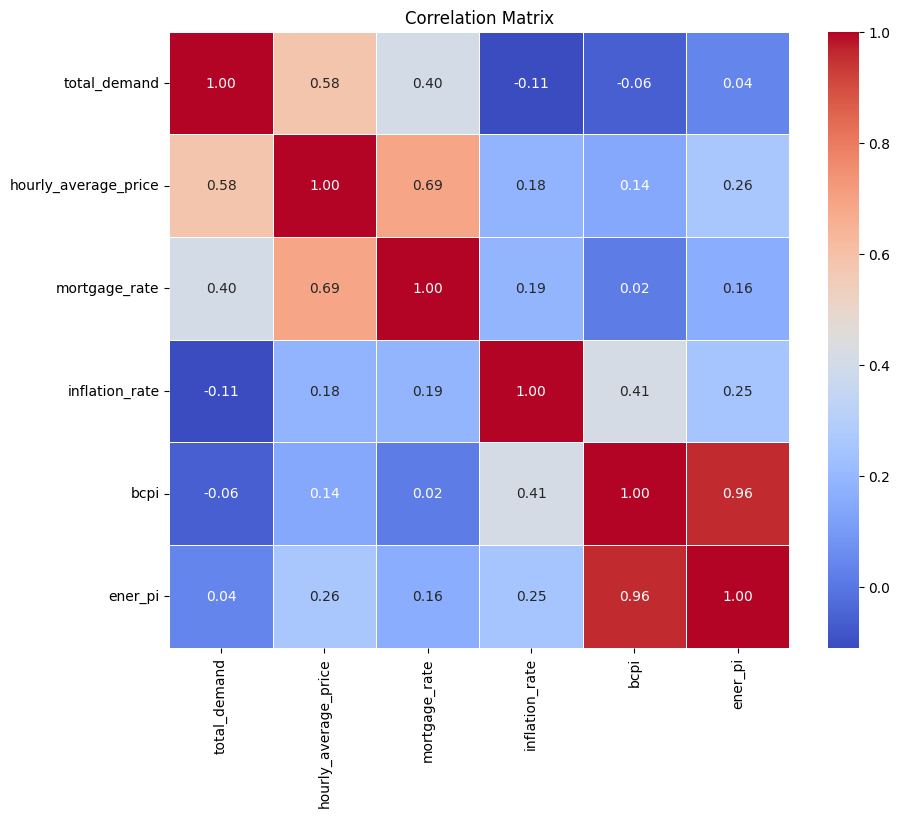

In [42]:
# Correlation Matrix

correlation_matrix = monthly_demand_price.corr()

import seaborn as sns

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**FORECASTING MONTHLY ELECTRICITY DEMAND**

Approach:
- Forecast Monthly demand using National Monthly Mortgage rates.
- Forecast Average Hourly Price using National Mortgage rates.
- Forecast Average Hourly Price using Monthly Energy Price Index.

In [43]:
forecast_data = monthly_demand_price.copy()

**MORTGAGE RATES AND TOTAL MONTHLY DEMAND**

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = np.array(forecast_data["mortgage_rate"]).reshape(-1, 1)
y = np.array(forecast_data["total_demand"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Mean Squared Error: 5.4805146806550285e+17
R-squared: 0.3234552253506868
Intercept: 9473937136.495012
Coefficient: [4.82410566e+08]


**MORTGAGE RATES AND AVERAGE HOURLY PRICES**

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = np.array(forecast_data["mortgage_rate"]).reshape(-1, 1)
y = np.array(forecast_data["hourly_average_price"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Mean Squared Error: 201.92642374922323
R-squared: 0.4678177604116739
Intercept: -24.34330176833594
Coefficient: [12.03027899]


**ENERGY PRICE INDEX AND AVERAGE HOURLY PRICE**

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = np.array(forecast_data["ener_pi"]).reshape(-1, 1)
y = np.array(forecast_data["hourly_average_price"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", model.score(X_test, y_test))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Mean Squared Error: 365.4881735281644
R-squared: 0.036746597499162204
Intercept: 18.816208668197284
Coefficient: [0.01165693]


**FINDINGS**

The variables perform poorly in predicting total monthly demand and average hourly prices.

MSE for all three models are very high and R^2 is not high enough for all of them.

Clustering might be able to provide more useful insights on the relationships between electricity demand, price and some of the chosen predictors.

**RELATIONSHIP BETWEEN USD/CAD EXCHANGE RATE AND ELECTRICITY PRICE, DEMAND IN ONTARIO**

In [47]:
usd_cad["date"] = pd.to_datetime(usd_cad["date"])


date_range_2 = pd.period_range(start="2017-03-01", end="2023-04-03", freq="D")
date_range_2_df = pd.DataFrame({"date": date_range_2})

daily_demand_price["date"] = pd.to_datetime(daily_demand_price["date"])

daily_demand_price = pd.merge(daily_demand_price, usd_cad, on="date", how="left")
daily_demand_price = daily_demand_price[(daily_demand_price["date"] >= "2017-03-01") & (daily_demand_price["date"] <= "2023-04-03")]

print(daily_demand_price.head())

           date  total_demand  hourly_average_price  FXUSDCAD
5418 2017-03-01     365648000              7.257917    1.3435
5419 2017-03-02     386491000             16.980000    1.3016
5420 2017-03-03     396240000              9.681250    1.3405
5421 2017-03-04     378929000             16.457917    1.3384
5422 2017-03-05     366478000              5.780833    1.3714


<ipython-input-47-f42280e2068e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  usd_cad["date"] = pd.to_datetime(usd_cad["date"])


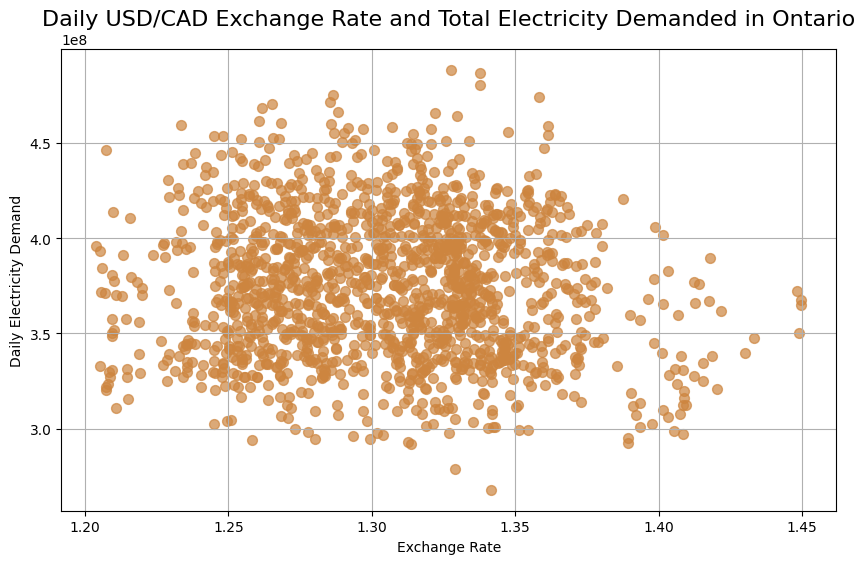

In [48]:
plt.figure(figsize=(10,6))

plt.scatter(x=daily_demand_price["FXUSDCAD"], y=daily_demand_price["total_demand"], alpha=0.7, s=50, color="peru")
plt.title("Daily USD/CAD Exchange Rate and Total Electricity Demanded in Ontario", fontsize=16)
plt.xlabel("Exchange Rate")
plt.ylabel("Daily Electricity Demand")
plt.grid(True)
plt.show()

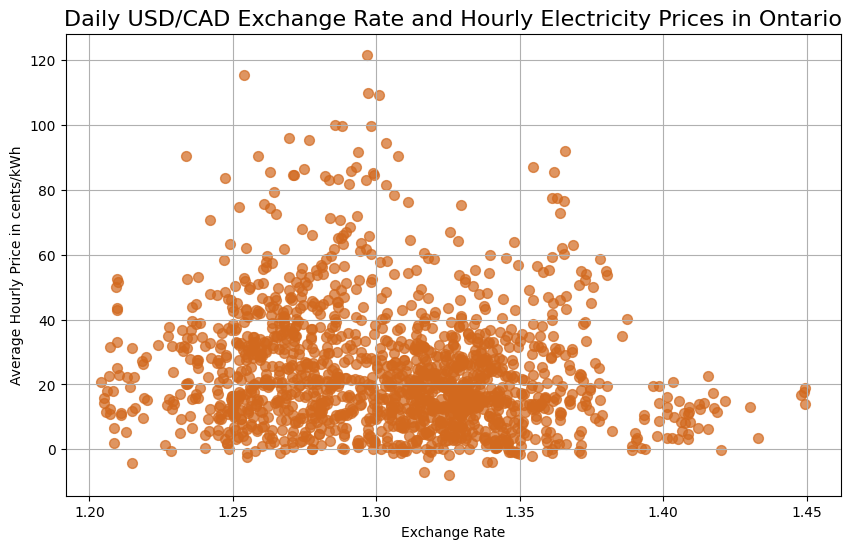

In [49]:
plt.figure(figsize=(10,6))

plt.scatter(x=daily_demand_price["FXUSDCAD"], y=daily_demand_price["hourly_average_price"], alpha=0.7, s=50, color="chocolate")
plt.title("Daily USD/CAD Exchange Rate and Hourly Electricity Prices in Ontario", fontsize=16)
plt.xlabel("Exchange Rate")
plt.ylabel("Average Hourly Price in cents/kWh")
plt.grid(True)
plt.show()

**IMPRESSIONS**

- There doesn't appear to be any clear relationship/patterns between exchange rate and electricity demand, average hourly price.
- There is a weak negative relationship between the exchange rate and  daily average hourly price of electricity.
- The relationship between the exchange rate and the total electricity demanded daily is weaker.
- However, it may be worthwile to run a cluster analysis.
- The scatter plot for Average Hourly Price and Exchange Rate hints that in the exchange rate band of 1.38-1.45, there is a positive relationship between the exchange rate and the average hourly price.

<ipython-input-50-bb398422ea33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_fx = daily_demand_price.corr()


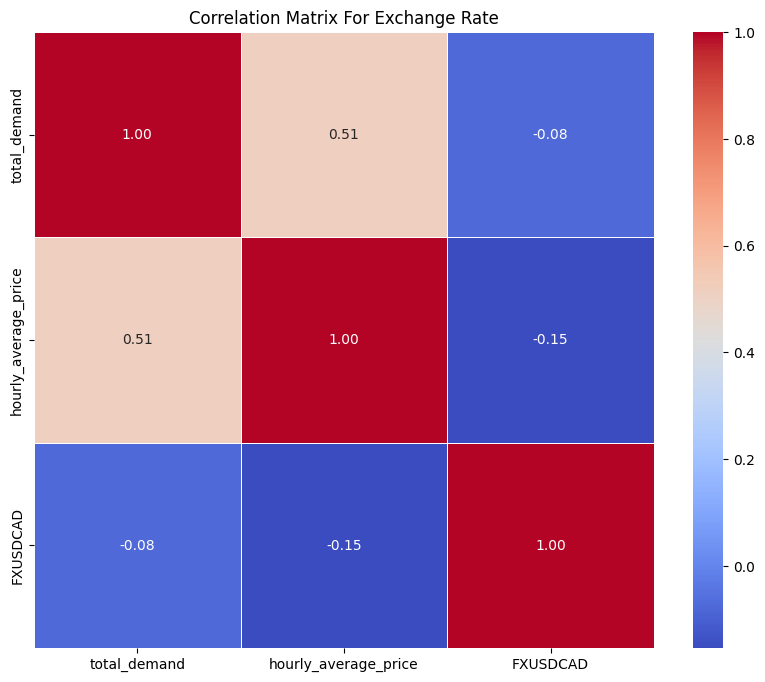

In [50]:
correlation_matrix_fx = daily_demand_price.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_fx, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix For Exchange Rate")
plt.show()

**NATIONAL INTEREST RATES AND DAILY ELECTRICITY DYNAMICS IN ONTARIO**

In [51]:
daily = demand_price_df.copy()

daily["date"] = daily["date"].dt.date
daily = daily.groupby("date").agg({"hourly_demand": "sum", "hourly_average_price": "mean"}).reset_index()
daily.rename(columns={"hourly_demand": "daily_demand"}, inplace=True)

In [52]:
corra["date"] = pd.to_datetime(corra["date"], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")
corra.rename(columns={"AVG.INTWO": "interest_rate"}, inplace=True)
corra.head()

,date,interest_rate
0,1997-08-12,3.250
1,1997-08-18,3.300
2,1997-08-19,3.260
3,1997-08-20,3.345
4,1997-08-21,3.385


In [53]:
daily["date"] = pd.to_datetime(daily["date"])
daily["date"] = daily["date"].dt.strftime("%Y-%m-%d")
daily = pd.merge(daily, corra, on="date", how="left")
daily = daily[(daily["date"] >= "2002-05-01") & (daily["date"] <= "2023-04-03")]

print(daily.head())

         date  daily_demand  hourly_average_price  interest_rate
0  2002-05-01     395175000             28.387917         2.2567
1  2002-05-02     409141000             30.090833         2.2540
2  2002-05-03     396259000             31.659583         2.2624
3  2002-05-04     354419000             26.552500            NaN
4  2002-05-05     338993000             24.855417            NaN


**VISUALIZING THE RELATIONSHIP BETWEEN INTEREST RATE AND DAILY DEMAND, AVERAGE HOURLY PRICE IN ONTARIO**

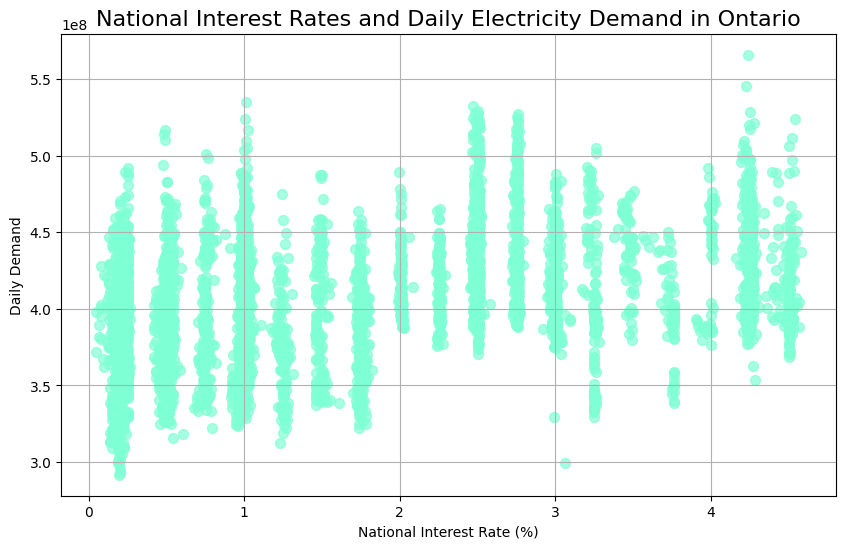

In [54]:
plt.figure(figsize=(10,6))

plt.scatter(x=daily["interest_rate"], y=daily["daily_demand"], alpha=0.7, s=50, color="aquamarine")
plt.title("National Interest Rates and Daily Electricity Demand in Ontario", fontsize=16)
plt.xlabel("National Interest Rate (%)")
plt.ylabel("Daily Demand")
plt.grid(True)
plt.show()

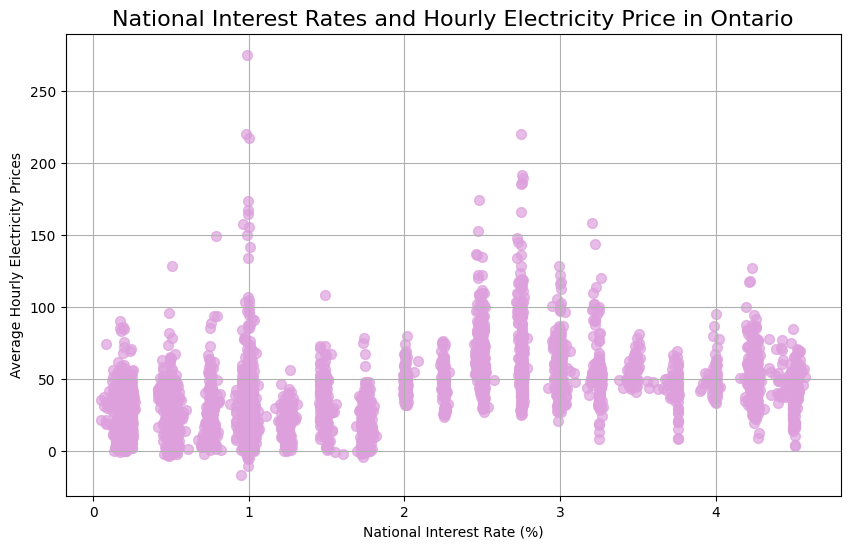

In [55]:
plt.figure(figsize=(10,6))

plt.scatter(x=daily["interest_rate"], y=daily["hourly_average_price"], alpha=0.7, s=50, color="plum")
plt.title("National Interest Rates and Hourly Electricity Price in Ontario", fontsize=16)
plt.xlabel("National Interest Rate (%)")
plt.ylabel("Average Hourly Electricity Prices")
plt.grid(True)
plt.show()

<ipython-input-56-5aed591f46d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_interest = daily.corr()


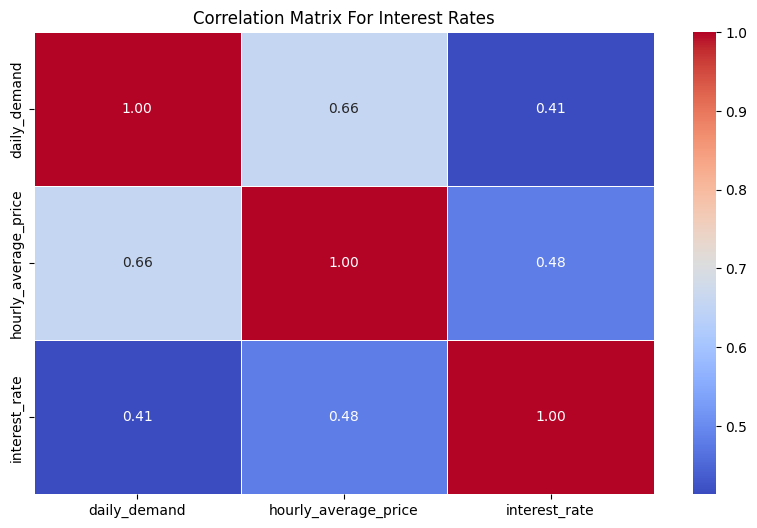

In [56]:
correlation_matrix_interest = daily.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_interest, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix For Interest Rates")
plt.show()

**Findings**

There is a positive but relatively weak relationship between National interest rates and average electricity prices, daily electricity demand in Ontario.

**DIVING DEEPER INTO EXCHANGE RATE AND ELECTRICITY DYNAMICS**

As alluded to previously, the scatterplot showed that there is a strong relationship with electricity demanded in Ontario when the USDCAD exchange rate is above 1.35.
- The same applies for FX and Price in the following exchange rate bands:
  1.2-1.27 and 1.38 and above.

**FXUSDCAD and Demand**

In [57]:
fx_demand = daily_demand_price[daily_demand_price["FXUSDCAD"]>=1.35]

fx_demand["total_demand"].corr(fx_demand["FXUSDCAD"])

-0.31784580433958914

In [58]:
fx_price_1 = daily_demand_price[daily_demand_price["FXUSDCAD"]>=1.38]

fx_price_1["hourly_average_price"].corr(fx_price_1["FXUSDCAD"])

-0.14623531903265918

In [59]:
fx_price_2 = daily_demand_price[(daily_demand_price["FXUSDCAD"]>=1.2) & (daily_demand_price["FXUSDCAD"]<=1.27)]

fx_price_2["hourly_average_price"].corr(fx_price_2["FXUSDCAD"])

0.13867684789457133

**Findings**

- None of the suspected relationships are strong enough to be acted upon.
- However, as FXUSDCAD increases above 1.35, the demand for electricity in Ontario is likely to decrease.
- As FXUSDCAD gets to 1.38 and above, the average hourly price of electricity in Ontario may decrease (the relationship is very weak).

**DIVING DEEPER INTO INTEREST RATES AND ONTARIO ELECTRICITY DYNAMICS**

Will investigate the relationship in the following interest rate bands:

- 0-1%
- 1-3%
- 3% and above

In [60]:
interest_1 = daily[daily["interest_rate"] <=1]
corr_demand = interest_1["interest_rate"].corr(interest_1["daily_demand"])
corr_price = interest_1["interest_rate"].corr(interest_1["hourly_average_price"])

print(corr_demand)
print(corr_price)

0.16328447843214716
0.10637044454475567


In [61]:
interest_2 = daily[daily["interest_rate"] >3]
corr_demand2 = interest_2["interest_rate"].corr(interest_2["daily_demand"])
corr_price2 = interest_2["interest_rate"].corr(interest_2["hourly_average_price"])

print(corr_demand2)
print(corr_price2)

0.1079718312464747
-0.22551831217319682


In [62]:
interest_3 = daily[(daily["interest_rate"] >1) & (daily["interest_rate"]<3)]
corr_demand3 = interest_3["interest_rate"].corr(interest_3["daily_demand"])
corr_price3 = interest_3["interest_rate"].corr(interest_3["hourly_average_price"])

print(corr_demand3)
print(corr_price3)

0.4447856160423782
0.5931256249279753


**FINDINGS**

- As interest rate increases at 3% and above, the average hourly price of electricity is likely to decrease and vice versa.
- When national interest rates are between 1 and 3 percent, the demand and average hourly price of electricity in Ontario are likely to move in the same direction as the interest rate.
- The likelihood is higher with the average hourly price.

**CONCLUSION**

The aim of this project was simply to investigate relationships between certain indicators and electricty dynamics in Ontario which could act as a guide in decision making/strategy development. Some interesting insights were revealed:

- National Mortgage Rates have a strong positive relationship with Electricity Demand and Prices in Ontario.
- National Interest rates have a positive relationship with Electricity demand and Prices in Ontario.
- Between 1 and 3% Interest rate, there is a strong positive relationship with Ontario Electricity Dynamics.
- Above 3%, there is a weak negative relationship.
- Demand is highest in Jan, Feb, July and August accordingly.
- Average Electricity prices are highes in Feb, August, Jan and July accordingly.